# Demo Deep Belief Network para identificar TIPOS de ANIMALES


0) Instalar paquete de DBN: 
( para más info ver https://github.com/albertbup/deep-belief-network/blob/master/README.md )

In [0]:
pip install git+git://github.com/albertbup/deep-belief-network.git

  Cloning git://github.com/albertbup/deep-belief-network.git to /tmp/pip-req-build-ragn1xmu
  Running command git clone -q git://github.com/albertbup/deep-belief-network.git /tmp/pip-req-build-ragn1xmu
  Created wheel for deep-belief-network: filename=deep_belief_network-1.0.3-cp36-none-any.whl size=13462 sha256=4df0213ffdb537515e3c1e8ee2cb60938168c3dd84bd9fefbb45b300ba09deda
  Stored in directory: /tmp/pip-ephem-wheel-cache-lowvk15d/wheels/29/6d/3b/6a50cf42a32bdfaa903b17832d60d8d3e5dc4b0fd02ae8acaf
Successfully built deep-belief-network


1) Cargar librerías:

In [0]:
# nota se debe indicar la versión 1 de TF para compatibilidad del código
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

from dbn.tensorflow import SupervisedDBNClassification
import numpy as np
import pandas as pd
from numpy.random import RandomState

from sklearn.metrics.classification import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

print ("Librerías cargadas.")


Librerías cargadas.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


2) Configurar los datos cargados (se debe definir de acuerdo a los datos):

In [0]:
# define clases (ejemplo ANIMALES)
CLASSES = ['na', 'MAMIFERO', 'AVE', 'REPTIL', 'PEZ', 'ANFIBIO', 'INSECTO', 'INVERTEBRADO']

# define nombre atributo de CLASE (ejemplo ANIMALES)
ClassAttributeName = 'TIPO'

print("Configuración definida de ", ClassAttributeName, ": ", CLASSES)

Configuración definida de  TIPO :  ['na', 'MAMIFERO', 'AVE', 'REPTIL', 'PEZ', 'ANFIBIO', 'INSECTO', 'INVERTEBRADO']


3) Cargar CSV con datos a procesar y preparar datos para entrenar y probar (ya separados):

In [0]:
# monta Google Drive:
# Nota: la primera vez se debe confirmar el uso logueandose en "Google Drive File Stream" y obteniendo código de autentificación.
from google.colab import drive
drive.mount('/content/gdrive')

# directorio local en Google Drive
path = '/content/gdrive/My Drive/IA/demo ANIMALES'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Carga los datos del CSV y muestra los primeros
df = pd.read_csv(path + '/datos/animales.csv')

df.head()

,TIENE_PELO,TIENE_PLUMAS,PONE_HUEVOS,DA_LECHE,ES_AEREO,ES_ACUATICO,ES_PREDADOR,TIENE_DIENTES,TIENE_COLUMNA,RESPIRA,ES_VENENOSO,TIENE_ALETAS,CANT_PATAS,TIENE_COLA,ES_DOMESTICO,TIPO
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [0]:
# separa al azar con proporción 80/20
rng = RandomState()

train = df.sample(frac=0.8, random_state=rng)
test = df.loc[~df.index.isin(train.index)]

print("Datos Originales ", df.shape)
print("- Datos para Entrenar ", train.shape)
print("- Datos para Probar ", test.shape)

Datos Originales  (101, 16)
- Datos para Entrenar  (81, 15)
- Datos para Probar  (20, 15)


In [0]:
# define datos de entrada y salida para entrenamiento
X_train = np.array(train.drop([ClassAttributeName], axis=1))
Y_train = np.array(train[ClassAttributeName])

# define datos de entrada y salida para testing
X_test = np.array(test.drop([ClassAttributeName], axis=1))
Y_test = np.array(test[ClassAttributeName])

print("Datos Originales ", len(X_train)+len(X_test))
print("- Datos para Entrenar ", len(X_train))
print("- Datos para Probar ", len(X_test))



Datos Originales  101
- Datos para Entrenar  81
- Datos para Probar  20


4) Especificar el modelo para la DBN:

In [0]:
classifier = SupervisedDBNClassification(hidden_layers_structure = [256, 256],
learning_rate_rbm=0.05,
learning_rate=0.1,
n_epochs_rbm=20,
n_iter_backprop=200,
batch_size=32,
activation_function='relu',
dropout_p=0.2)

print(classifier)

SupervisedDBNClassification(batch_size=32, dropout_p=0.2, idx_to_label_map=None,
                            l2_regularization=1.0, label_to_idx_map=None,
                            learning_rate=0.1, n_iter_backprop=200,
                            verbose=True)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


5) Entrenar el modelo de la DBN:

In [0]:
classifier.fit(X_train, Y_train)

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 2.922361
>> Epoch 2 finished 	RBM Reconstruction error 2.872783
>> Epoch 3 finished 	RBM Reconstruction error 2.420814
>> Epoch 4 finished 	RBM Reconstruction error 2.142596
>> Epoch 5 finished 	RBM Reconstruction error 1.915712
>> Epoch 6 finished 	RBM Reconstruction error 1.670878
>> Epoch 7 finished 	RBM Reconstruction error 1.504569
>> Epoch 8 finished 	RBM Reconstruction error 1.326916
>> Epoch 9 finished 	RBM Reconstruction error 1.249731
>> Epoch 10 finished 	RBM Reconstruction error 1.143575
>> Epoch 11 finished 	RBM Reconstruction error 1.076103
>> Epoch 12 finished 	RBM Reconstruction error 0.993748
>> Epoch 13 finished 	RBM Reconstruction error 0.913201
>> Epoch 14 finished 	RBM Reconstruction error 0.866394
>> Epoch 15 finished 	RBM Reconstruction error 0.863694
>> Epoch 16 finished 	RBM Reconstruction error 0.882518
>> Epoch 17 finished 	RBM Reconstruction error 0.770099
>> Epoch 18 finished 	RBM Reco

SupervisedDBNClassification(batch_size=32, dropout_p=0.2,
                            idx_to_label_map={0: 4, 1: 1, 2: 6, 3: 5, 4: 2,
                                              5: 7, 6: 3},
                            l2_regularization=1.0,
                            label_to_idx_map={1: 1, 2: 4, 3: 6, 4: 0, 5: 3,
                                              6: 2, 7: 5},
                            learning_rate=0.1, n_iter_backprop=200,
                            verbose=True)

6) Evaluar el modelo de la RNA entrenado:


Exactitud: 0.950000

 Resultados: 
Clase predecida es "MAMIFERO"[1], la correcta es "MAMIFERO"[1] 
Clase predecida es "PEZ"[4], la correcta es "PEZ"[4] 
Clase predecida es "MAMIFERO"[1], la correcta es "MAMIFERO"[1] 
Clase predecida es "MAMIFERO"[1], la correcta es "MAMIFERO"[1] 
Clase predecida es "AVE"[2], la correcta es "AVE"[2] 
Clase predecida es "INVERTEBRADO"[7], la correcta es "INVERTEBRADO"[7] 
Clase predecida es "MAMIFERO"[1], la correcta es "MAMIFERO"[1] 
Clase predecida es "MAMIFERO"[1], la correcta es "MAMIFERO"[1] 
Clase predecida es "AVE"[2], la correcta es "AVE"[2] 
Clase predecida es "MAMIFERO"[1], la correcta es "MAMIFERO"[1] 
Clase predecida es "AVE"[2], la correcta es "AVE"[2] 
Clase predecida es "AVE"[2], la correcta es "AVE"[2] 
Clase predecida es "MAMIFERO"[1], la correcta es "MAMIFERO"[1] 
Clase predecida es "AVE"[2], la correcta es "AVE"[2] 
Clase predecida es "MAMIFERO"[1], la correcta es "MAMIFERO"[1] 
Clase predecida es "REPTIL"[3], la correcta es "REPTIL"[

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


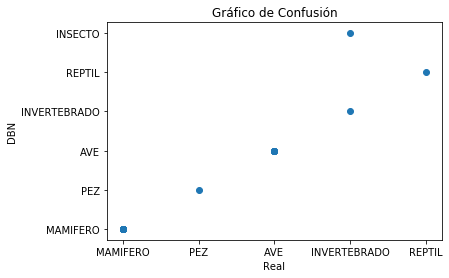

In [0]:
# ejecuta el  modelo
Y_pred = classifier.predict(X_test)

# calcula la exactitud
print('\nExactitud: %f' % accuracy_score(Y_test, Y_pred))

# muestra resultados de la predicción
classPreds = []
classReal = []
cantOK = 0
cantError = 0
print("\n Resultados: ")
for pred_class_id, expec in zip(Y_pred, Y_test):
    
    classPreds.append(CLASSES[pred_class_id])
    classReal.append(CLASSES[expec])

    if (pred_class_id == expec): 
      res = ""
      cantOK += 1
    else: 
      res = "!"
      cantError += 1

    print('Clase predecida es "{}"[{}], la correcta es "{}"[{}]{} '.format(
        CLASSES[pred_class_id], pred_class_id, CLASSES[expec], expec, res))

print('=== Total Ejemplos: {}, con {} predicciones ok y {} errores.'.format(cantOK+cantError, cantOK, cantError))

# gráfico de comparación
plt.title('Gráfico de Confusión')
plt.xlabel('Real')
plt.ylabel('DBN')
plt.scatter(classReal, classPreds)

# muestra reporte de clasificación
print("\n Reporte de Clasificación: ")
print(classification_report(classReal, classPreds))

# muestra matriz de confusion
print('\nMatriz de Confusión: ')
cm = confusion_matrix(classReal, classPreds, labels=CLASSES)
cmtx = pd.DataFrame(
    cm, 
    index=['r:{:}'.format(x) for x in CLASSES], 
    columns=['p:{:}'.format(x) for x in CLASSES]
  )
print(cmtx)
print("\n")
